# Notebook 03 - Exploratory Data Analysis (EDA)

In this notebook, we explore the cleaned dataset containing clinical, cognitive, behavioral, and lifestyle information related to Alzheimer's disease. This dataset was prepared in Notebook 2 (02_Data_Loading_And_Preprocessing.ipynb) and includes key patient details such as age, gender, test scores, medical history, and daily habits.

The goal of this analysis is to better understand how different features relate to the Alzheimer's diagnosis. Specifically, we aim to:

- Examine how individual variables are distributed  
- Compare feature values across diagnosis groups  
- Identify patterns, trends, and correlations that could be useful for prediction  
- Select potentially important features for use in machine learning models

This exploration helps us make informed decisions about which variables to include and how to prepare them for modeling. It also supports our main research question from Notebook 1:

**Can we predict Alzheimer’s diagnosis using clinical, cognitive, and lifestyle-related features?**

The insights we gain here will directly guide the model development phase in Notebook 4 (04_Model_Training_and_Evaluation.ipynb).

## Understanding Values in the Cleaned Dataset
The dataset we are working with has been cleaned and is now ready for analysis and modeling. All missing values have been handled, and the structure is complete. The features describe various aspects of each patient’s health, habits, and cognitive condition. Below is a breakdown of the columns grouped by category. This overview helps us understand what each variable represents and how it fits into the overall picture of Alzheimer’s risk. These categories guide us as we choose which features to analyze, scale, or model.

#### Demographics
- **PatientID** – Unique identifier for each patient (not used for prediction)  
- **Age** – Patient’s age, mostly between 60 and 90  
- **Gender** – 0 = Male, 1 = Female  
- **Ethnicity** – 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other  
- **EducationLevel** – 0 to 3, where higher numbers represent more education  

#### Lifestyle
- **Smoking** – 0 = No, 1 = Yes  
- **AlcoholConsumption** – Numeric value showing amount of alcohol consumed  
- **PhysicalActivity** – Activity level score  
- **DietQuality** – Diet health score  
- **SleepQuality** – Sleep health score  
- **BMI** – Body Mass Index  

#### Medical History
- **FamilyHistoryAlzheimers** – 0 = No, 1 = Yes (genetic link)  
- **CardiovascularDisease** – 0 = No, 1 = Yes  
- **Diabetes** – 0 = No, 1 = Yes  
- **Depression** – 0 = No, 1 = Yes  
- **HeadInjury** – 0 = No, 1 = Yes  
- **Hypertension** – 0 = No, 1 = Yes  

#### Clinical Values
- **SystolicBP** – Systolic blood pressure  
- **DiastolicBP** – Diastolic blood pressure  
- **CholesterolTotal** – Total cholesterol  
- **CholesterolLDL** – "Bad" cholesterol  
- **CholesterolHDL** – "Good" cholesterol  
- **CholesterolTriglycerides** – Another cholesterol type  

#### Cognitive and Functional Assessments
- **MMSE** – Mini-Mental State Exam score (0–30)  
- **FunctionalAssessment** – Measures daily function  
- **ADL** – Activities of Daily Living score  
- **MemoryComplaints** – 0 = No, 1 = Yes  
- **BehavioralProblems** – 0 = No, 1 = Yes  

#### Symptoms and Behavior
- **Confusion** – 0 = No, 1 = Yes  
- **Disorientation** – 0 = No, 1 = Yes  
- **PersonalityChanges** – 0 = No, 1 = Yes  
- **DifficultyCompletingTasks** – 0 = No, 1 = Yes  
- **Forgetfulness** – 0 = No, 1 = Yes  
yet
- **Diagnosis** – This is the target column: 0 = No Alzheimer’s, 1 = Alzheimer’s  

#### Removed Column
- **DoctorInCharge** – Removed due to containing anonymized text, not relevant for analysis  

---------------------------------

## Research Questions

In this notebook, we will look into some of the main research questions from our project, using data analysis to explore and better understand them:

**1. Can we predict the risk of Alzheimer's disease based on demographic and lifestyle factors such as age, gender, physical activity, and diet?**
- We will look for clear patterns that separate patients with Alzheimer’s from those without.
- We will check if features like age, MMSE score, or physical activity are linked to diagnosis outcomes.

**2. Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**
- We will explore which features show strong differences between groups and are good candidates for use in a prediction model.

---------------------------

## Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [1]:
# Add the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Import custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)
from utils.save_tools import save_plot, save_notebook_and_summary

# Import commonly used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Run environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


-------------------------

## Load Dataset

### We load our cleaned dataset

In [2]:
df = pd.read_csv("../data/alzheimers_clean.csv")
print("Cleaned dataset loaded. Shape:", df.shape)

Cleaned dataset loaded. Shape: (2149, 33)


--------------------

### Using Outlier-Free Dataset
In Notebook 02, we removed outliers from the dataset using the IQR method. That version was saved as alzheimers_no_outliers.csv.
If we want to re-run any visualizations with this dataset, we can load that version here.

In [3]:
# Load the outlier-free version (optional)
df_no_outliers = pd.read_csv("../data/alzheimers_no_outliers.csv")
print("Outlier-free dataset loaded. Shape:", df_no_outliers.shape)

Outlier-free dataset loaded. Shape: (2149, 33)


### Outlier Check Confirmation
We compared three features (MMSE, BMI, CholesterolTotal) across the original cleaned dataset and the version with outliers removed using the IQR method.

There is no visual or structural difference between the two datasets. This confirms that:

- The original dataset did not contain extreme values based on the IQR rule
- All data values fall within realistic and clinically expected ranges
- The outlier removal step in Notebook 02 was executed correctly, but had no effect on the dataset size or shape

Therefore, we continue analysis using the cleaned dataset, as the outlier-free version is functionally the same.

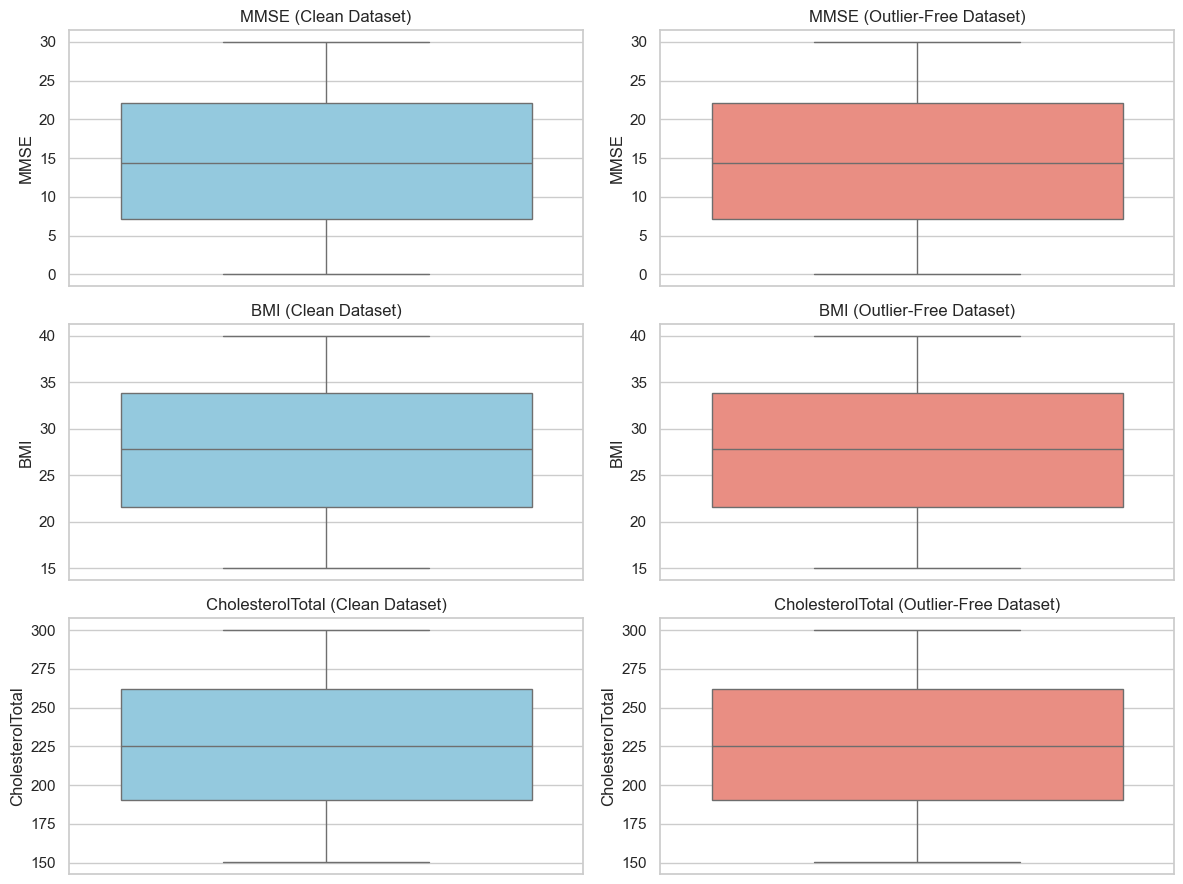

Plot saved to: ../plots\clean_vs_no_outliers_boxplot.png
Caption saved to: ../plots\clean_vs_no_outliers_boxplot.txt


In [4]:
# Load both datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = pd.read_csv("../data/alzheimers_clean.csv")
df_no_outliers = pd.read_csv("../data/alzheimers_no_outliers.csv")

# Define features to compare
key_features = ["MMSE", "BMI", "CholesterolTotal"]

# Generate side-by-side boxplots
plt.figure(figsize=(12, 9))
for idx, feature in enumerate(key_features):
    # Plot clean dataset
    plt.subplot(3, 2, 2 * idx + 1)
    sns.boxplot(y=df_clean[feature], color="skyblue")
    plt.title(f"{feature} (Clean Dataset)")

    # Plot outlier-free dataset
    plt.subplot(3, 2, 2 * idx + 2)
    sns.boxplot(y=df_no_outliers[feature], color="salmon")
    plt.title(f"{feature} (Outlier-Free Dataset)")

plt.tight_layout()
plt.show()

# Save the plot using helper method in utils folder 
fig = plt.gcf()
save_plot(
    fig,
    filename="clean_vs_no_outliers_boxplot.png",
    caption="Boxplots comparing selected features before and after outlier removal.",
    folder_path="../plots"
)

--------------------

## Target Variable: Diagnosis

We start by reviewing the distribution of the target variable Diagnosis, which indicates whether the patient has been diagnosed with Alzheimer's:disease. The variables are:

- 0 = Patient does not have Alzheimer's
- 1 = Patient has Alzheimer's

Understanding the distribution of this variable helps us check whether the dataset is balanced or imbalanced, which can affect how we train and evaluate models later.

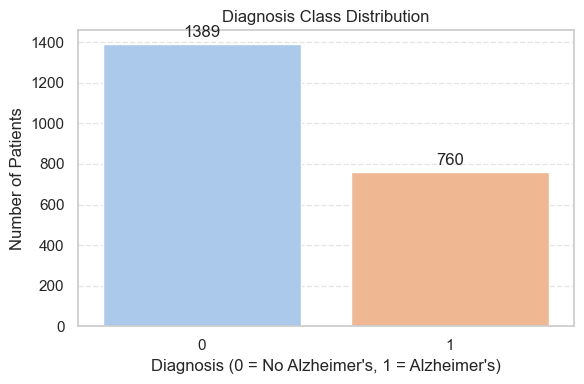

Plot saved to: ../plots\diagnosis_class_distribution.png
Caption saved to: ../plots\diagnosis_class_distribution.txt


In [5]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="Diagnosis", hue="Diagnosis", palette="pastel", legend=False)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.ylabel("Number of Patients")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.tight_layout()
plt.show()

# Save the plot using helper method in utils folder
fig = plt.gcf()
save_plot(
    fig,
    filename="diagnosis_class_distribution.png",
    caption="Bar chart showing the number of patients with and without Alzheimer's diagnosis.",
    folder_path="../plots"
)

### Understanding the Results

This bar chart shows the number of patients in each diagnosis category. There are 1,389 individuals without Alzheimer’s and 760 with Alzheimer’s. While not perfectly balanced, this distribution is reasonably proportionate.

Having both classes well-represented is important for training machine learning models. It ensures the model has enough examples to learn patterns from both groups. If the dataset were heavily imbalanced, the model might become biased toward the majority class and struggle to predict the minority class accurately.

Overall, this class distribution is suitable for binary classification tasks and provides a solid foundation for building predictive models.

--------------------------------

## Binary Features by Diagnosis

This chart shows how common each binary feature (e.g., Depression, Head Injury, Hypertension) is within each diagnosis group. We calculate the percentage of patients who have each condition (value = 1) for both those diagnosed with Alzheimer’s and those not diagnosed. These comparisons help us identify which symptoms or risk factors are more frequently observed in Alzheimer’s patients and may be useful in building predictive models.

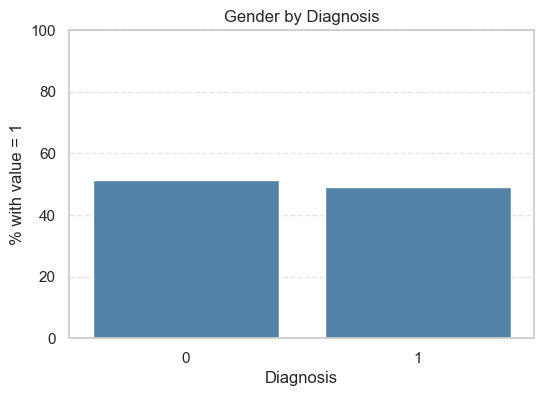

Plot saved to: ../plots/binary_features\binary_gender.png
Caption saved to: ../plots/binary_features\binary_gender.txt


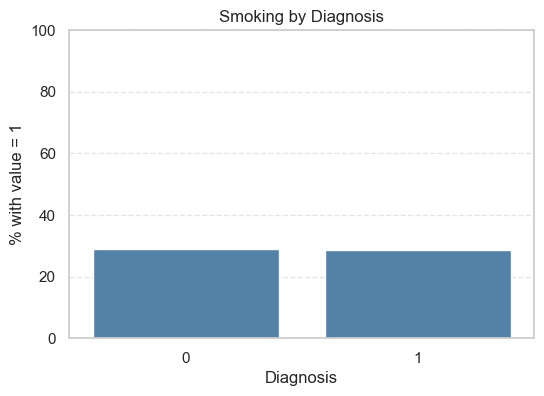

Plot saved to: ../plots/binary_features\binary_smoking.png
Caption saved to: ../plots/binary_features\binary_smoking.txt


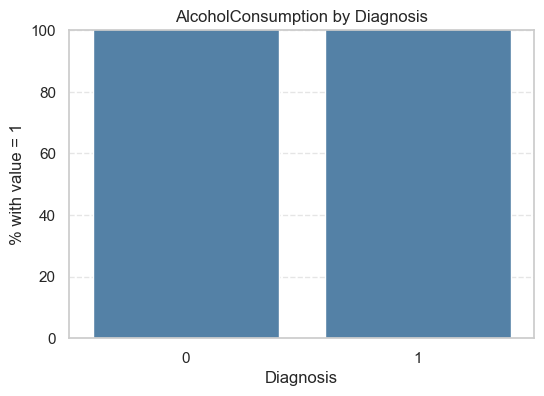

Plot saved to: ../plots/binary_features\binary_alcoholconsumption.png
Caption saved to: ../plots/binary_features\binary_alcoholconsumption.txt


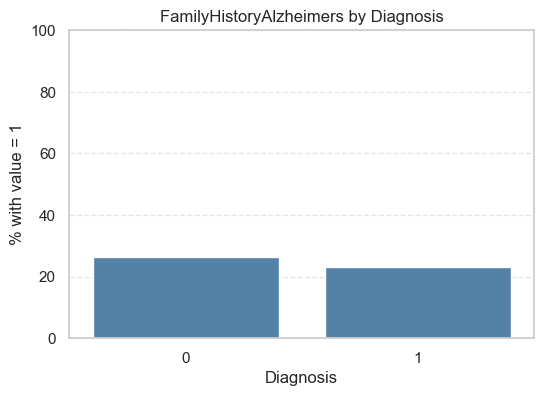

Plot saved to: ../plots/binary_features\binary_familyhistoryalzheimers.png
Caption saved to: ../plots/binary_features\binary_familyhistoryalzheimers.txt


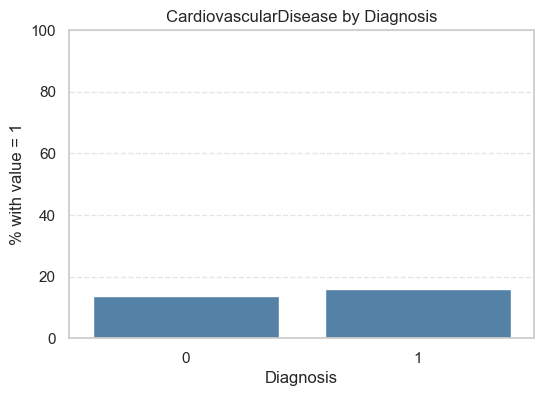

Plot saved to: ../plots/binary_features\binary_cardiovasculardisease.png
Caption saved to: ../plots/binary_features\binary_cardiovasculardisease.txt


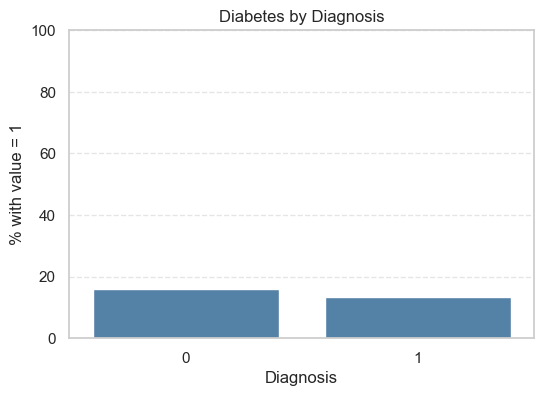

Plot saved to: ../plots/binary_features\binary_diabetes.png
Caption saved to: ../plots/binary_features\binary_diabetes.txt


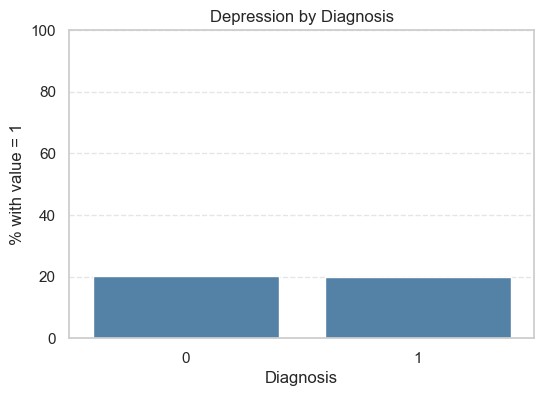

Plot saved to: ../plots/binary_features\binary_depression.png
Caption saved to: ../plots/binary_features\binary_depression.txt


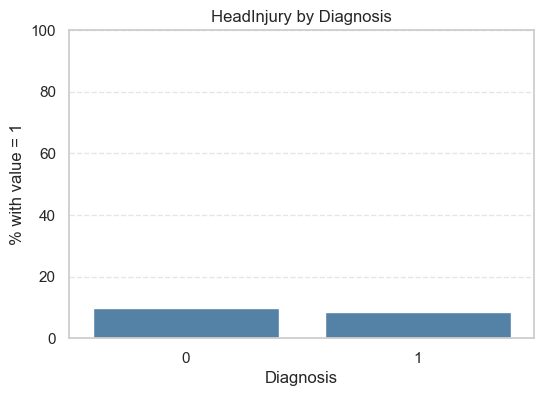

Plot saved to: ../plots/binary_features\binary_headinjury.png
Caption saved to: ../plots/binary_features\binary_headinjury.txt


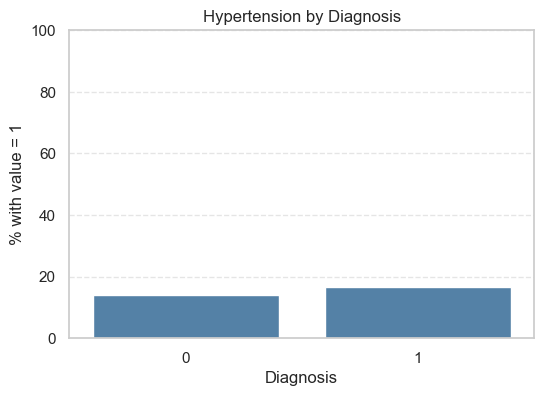

Plot saved to: ../plots/binary_features\binary_hypertension.png
Caption saved to: ../plots/binary_features\binary_hypertension.txt


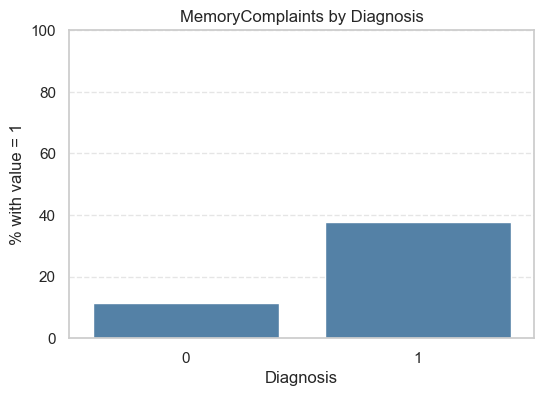

Plot saved to: ../plots/binary_features\binary_memorycomplaints.png
Caption saved to: ../plots/binary_features\binary_memorycomplaints.txt


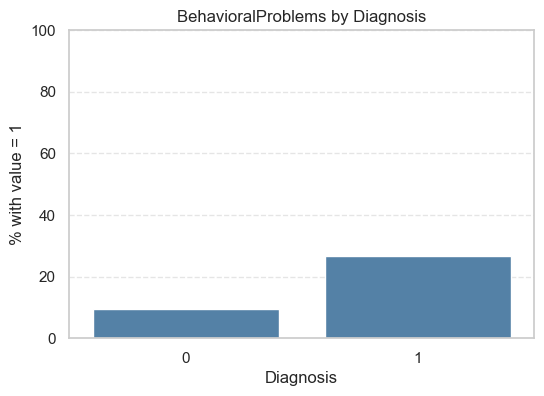

Plot saved to: ../plots/binary_features\binary_behavioralproblems.png
Caption saved to: ../plots/binary_features\binary_behavioralproblems.txt


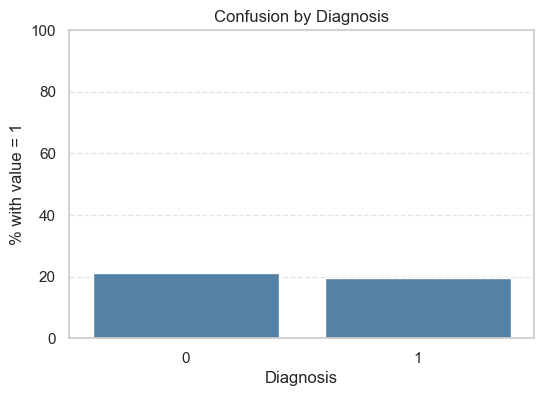

Plot saved to: ../plots/binary_features\binary_confusion.png
Caption saved to: ../plots/binary_features\binary_confusion.txt


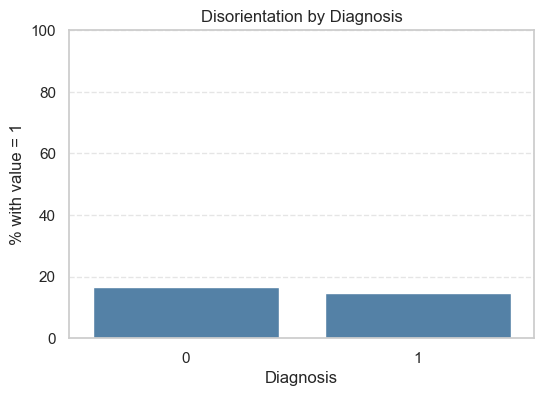

Plot saved to: ../plots/binary_features\binary_disorientation.png
Caption saved to: ../plots/binary_features\binary_disorientation.txt


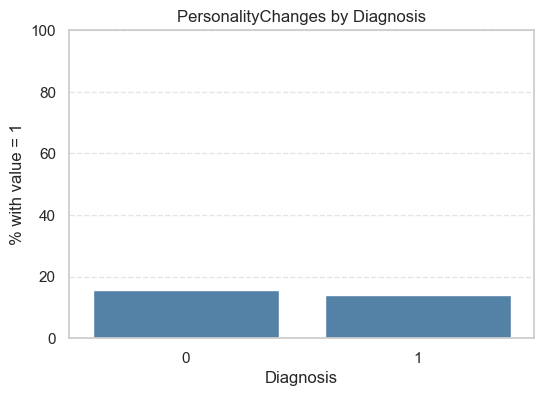

Plot saved to: ../plots/binary_features\binary_personalitychanges.png
Caption saved to: ../plots/binary_features\binary_personalitychanges.txt


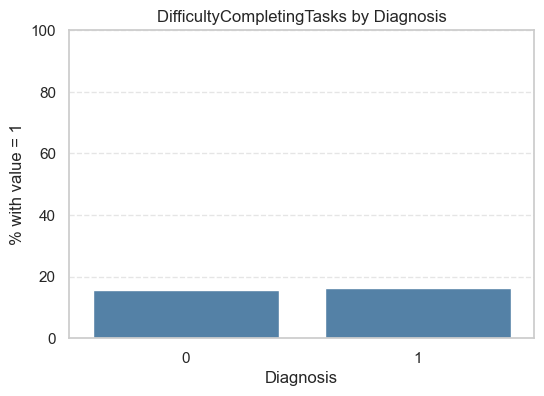

Plot saved to: ../plots/binary_features\binary_difficultycompletingtasks.png
Caption saved to: ../plots/binary_features\binary_difficultycompletingtasks.txt


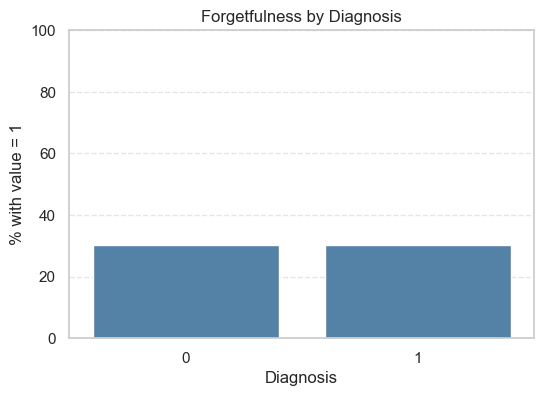

Plot saved to: ../plots/binary_features\binary_forgetfulness.png
Caption saved to: ../plots/binary_features\binary_forgetfulness.txt


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

binary_features = [
    "Gender", "Smoking", "AlcoholConsumption", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury",
    "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

# Save each plot separately
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    values = df.groupby("Diagnosis")[feature].mean() * 100
    ax = sns.barplot(x=values.index, y=values.values, color='steelblue')
    plt.title(f"{feature} by Diagnosis")
    plt.ylabel("% with value = 1")
    plt.xlabel("Diagnosis")
    plt.ylim(0, 100)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

    # Save each figure
    fig = plt.gcf()
    save_plot(
        fig,
        filename=f"binary_{feature.lower()}.png",
        caption=f"Bar chart showing percentage of patients with {feature} = 1, grouped by Alzheimer's diagnosis.",
        folder_path="../plots/binary_features"
    )

    plt.close()

------------------------

## Distribution of Continuous Features

Here we explore the distribution of continuous features in the dataset. This step helps us answer the following questions:

- Is the feature normally distributed, skewed, or multimodal?
- Are there any visible outliers?
- Do we need to apply scaling or transformations later for modeling?

We use histograms with KDE (kernel density estimate) overlays to visualize the shape of each distribution across the patient population.

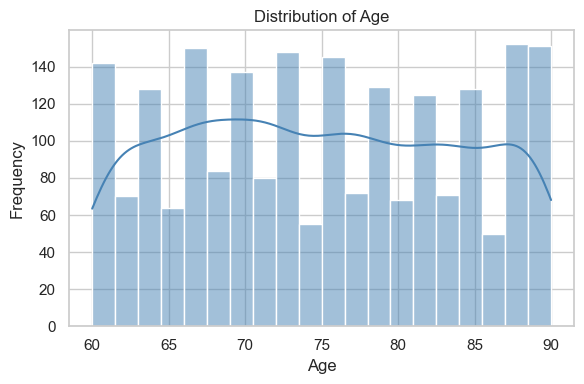

Plot saved to: ../plots\age_distribution.png
Caption saved to: ../plots\age_distribution.txt


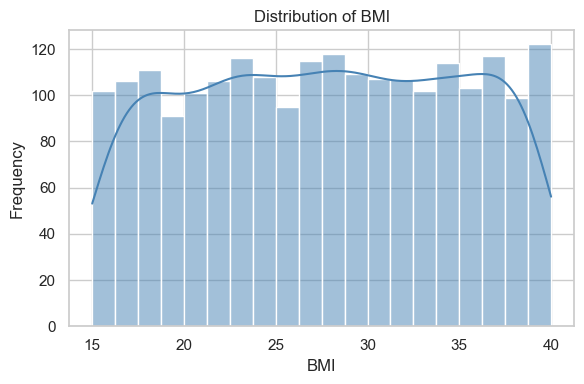

Plot saved to: ../plots\bmi_distribution.png
Caption saved to: ../plots\bmi_distribution.txt


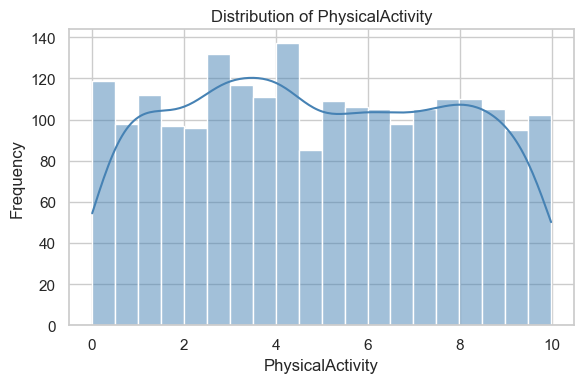

Plot saved to: ../plots\physicalactivity_distribution.png
Caption saved to: ../plots\physicalactivity_distribution.txt


Plot saved to: ../plots\dietquality_distribution.png
Caption saved to: ../plots\dietquality_distribution.txt


Plot saved to: ../plots\sleepquality_distribution.png
Caption saved to: ../plots\sleepquality_distribution.txt


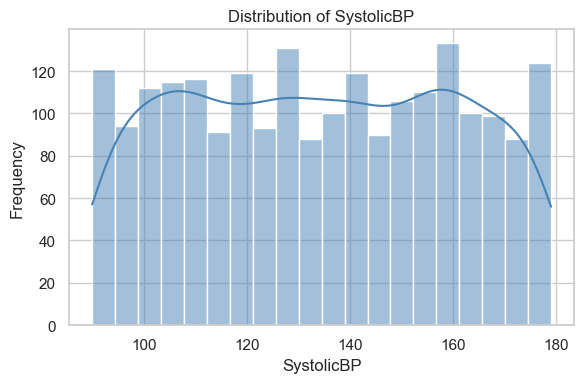

Plot saved to: ../plots\systolicbp_distribution.png
Caption saved to: ../plots\systolicbp_distribution.txt


Plot saved to: ../plots\diastolicbp_distribution.png
Caption saved to: ../plots\diastolicbp_distribution.txt


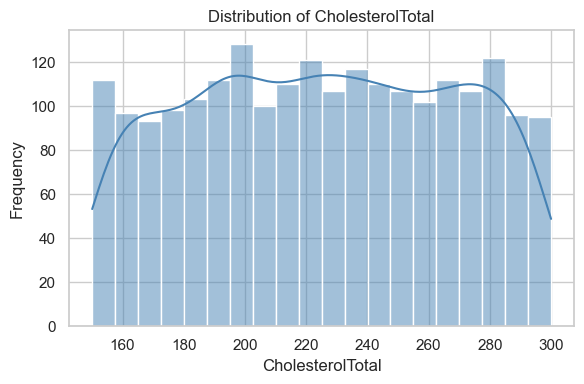

Plot saved to: ../plots\cholesteroltotal_distribution.png
Caption saved to: ../plots\cholesteroltotal_distribution.txt


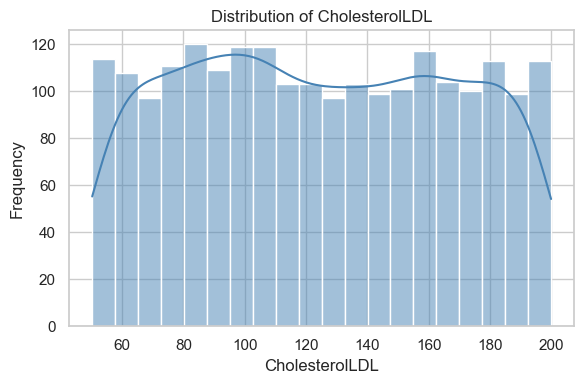

Plot saved to: ../plots\cholesterolldl_distribution.png
Caption saved to: ../plots\cholesterolldl_distribution.txt


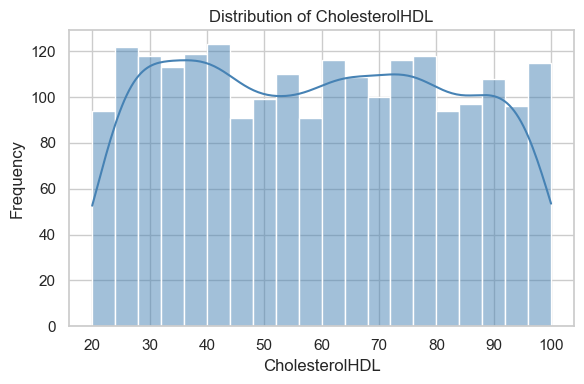

Plot saved to: ../plots\cholesterolhdl_distribution.png
Caption saved to: ../plots\cholesterolhdl_distribution.txt


Plot saved to: ../plots\cholesteroltriglycerides_distribution.png
Caption saved to: ../plots\cholesteroltriglycerides_distribution.txt


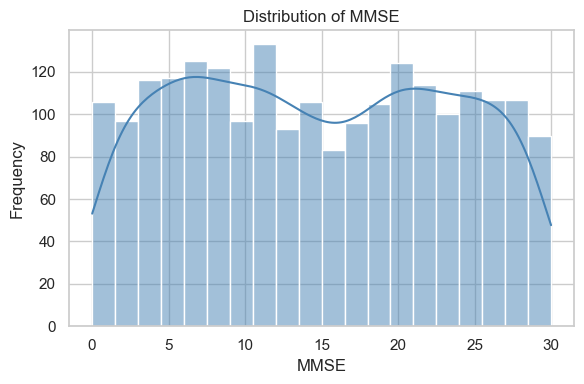

Plot saved to: ../plots\mmse_distribution.png
Caption saved to: ../plots\mmse_distribution.txt


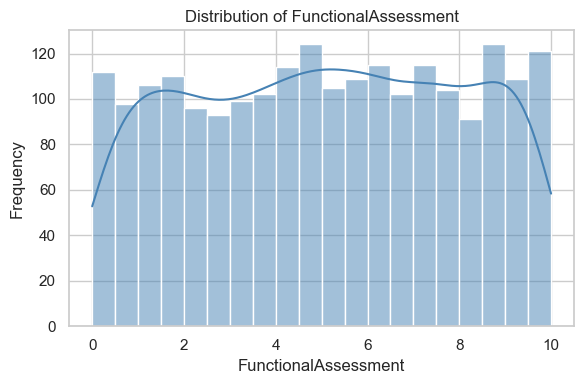

Plot saved to: ../plots\functionalassessment_distribution.png
Caption saved to: ../plots\functionalassessment_distribution.txt


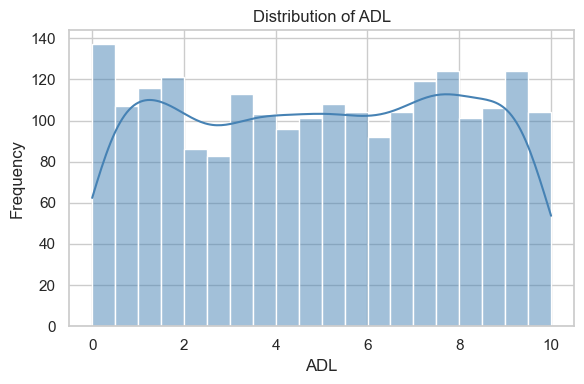

Plot saved to: ../plots\adl_distribution.png
Caption saved to: ../plots\adl_distribution.txt


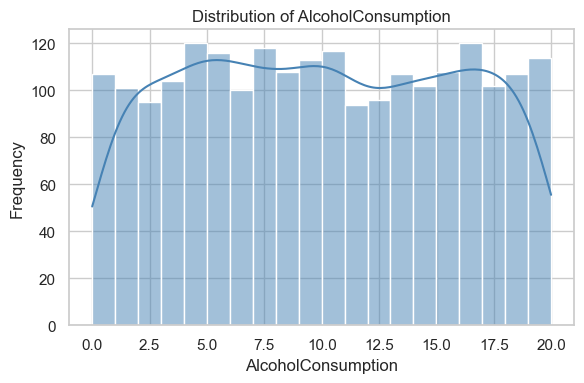

Plot saved to: ../plots\alcoholconsumption_distribution.png
Caption saved to: ../plots\alcoholconsumption_distribution.txt


In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent style
sns.set(style="whitegrid")

# List of continuous features
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL", "AlcoholConsumption"
]

# Directory to save plots
plot_folder = "../plots"

# Generate and save each histogram
for feature in continuous_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=20, color="steelblue", ax=ax)
    
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    # Save plot using helper
    save_plot(
        fig,
        filename=f"{feature.lower()}_distribution.png",
        caption=f"Distribution of {feature} with KDE overlay.",
        folder_path=plot_folder
    )


#### Note on AlcoholConsumption
In the earlier section on binary features, AlcoholConsumption was mistakenly treated as a binary variable.
After reviewing its distribution here, we now confirm that it is a continuous feature, representing the amount of alcohol consumed per patient (likely in units per week).

This visualization shows a right-skewed distribution, where most patients consume low amounts of alcohol, but a few report significantly higher levels.

We will now treat AlcoholConsumption as a continuous lifestyle variable for all future analysis and modeling.

### Interpretation of Distributions

From these histograms, we can observe the following:

- Age is well distributed between 60 and 90, reflecting the target population for Alzheimer's screening.

- BMI, SleepQuality, and DietQuality show mild skew but remain within expected ranges.

- Cholesterol values and Blood Pressure readings show broader distributions, which may reflect variability in cardiovascular risk among the patients.

- MMSE, FunctionalAssessment, and ADL are clearly non-normal, with multiple peaks. This is expected for bounded clinical scores that are often clustered at high or low ends.

- AlcoholConsumption is positively skewed, with most values concentrated at lower levels and a few patients reporting high consumption. This may affect scaling decisions.

This analysis gives us an early idea of which variables might need transformation before modeling and where outliers or extreme values may exist.

## Boxplots of Continuous Features by Diagnosis
We now compare the continuous variables between patients with and without an Alzheimer's diagnosis using boxplots.

This visual comparison helps us identify features that show meaningful separation between the groups, which is useful for both feature selection and understanding disease patterns.

Boxplots display:

- The median (central line)
- The interquartile range (box)
- Outliers and the overall spread of each feature

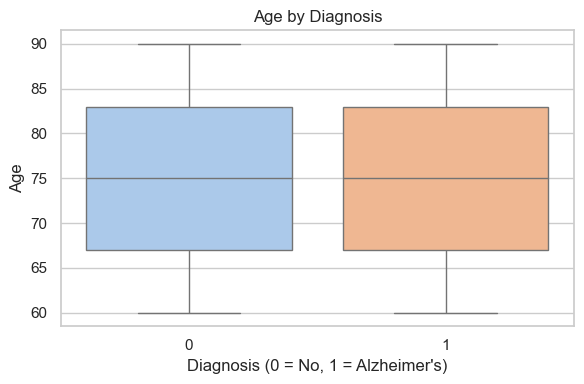

Plot saved to: ../plots\age_boxplot_by_diagnosis.png
Caption saved to: ../plots\age_boxplot_by_diagnosis.txt


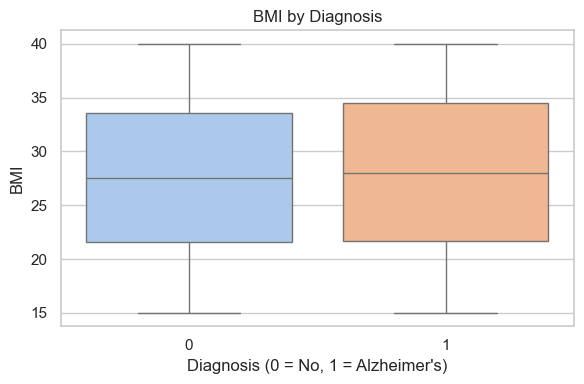

Plot saved to: ../plots\bmi_boxplot_by_diagnosis.png
Caption saved to: ../plots\bmi_boxplot_by_diagnosis.txt


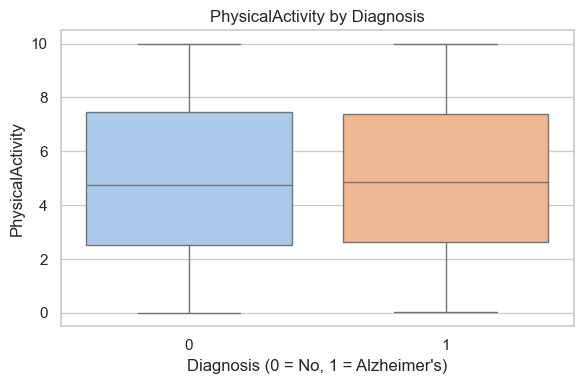

Plot saved to: ../plots\physicalactivity_boxplot_by_diagnosis.png
Caption saved to: ../plots\physicalactivity_boxplot_by_diagnosis.txt


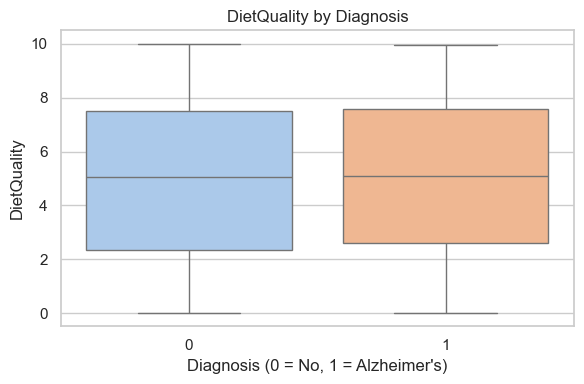

Plot saved to: ../plots\dietquality_boxplot_by_diagnosis.png
Caption saved to: ../plots\dietquality_boxplot_by_diagnosis.txt


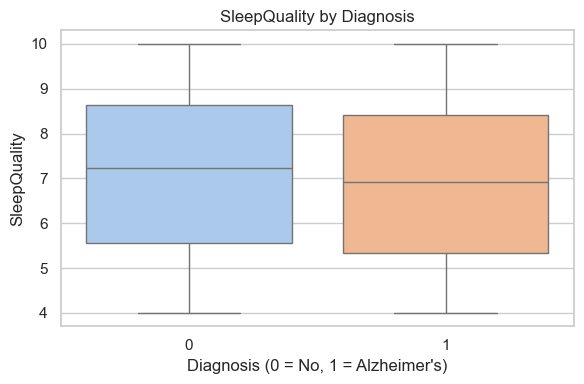

Plot saved to: ../plots\sleepquality_boxplot_by_diagnosis.png
Caption saved to: ../plots\sleepquality_boxplot_by_diagnosis.txt


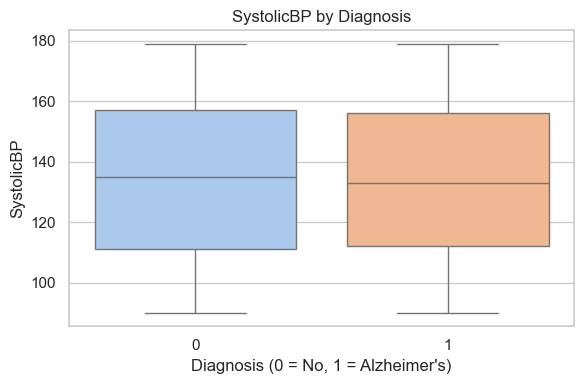

Plot saved to: ../plots\systolicbp_boxplot_by_diagnosis.png
Caption saved to: ../plots\systolicbp_boxplot_by_diagnosis.txt


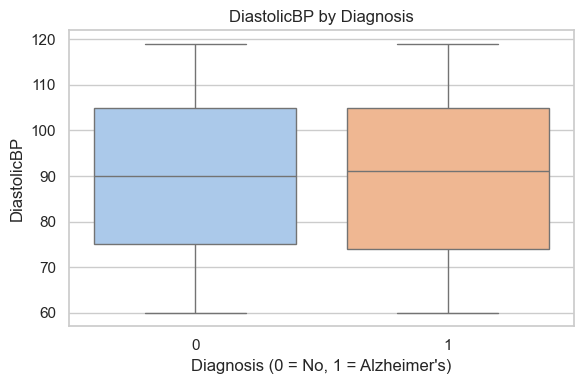

Plot saved to: ../plots\diastolicbp_boxplot_by_diagnosis.png
Caption saved to: ../plots\diastolicbp_boxplot_by_diagnosis.txt


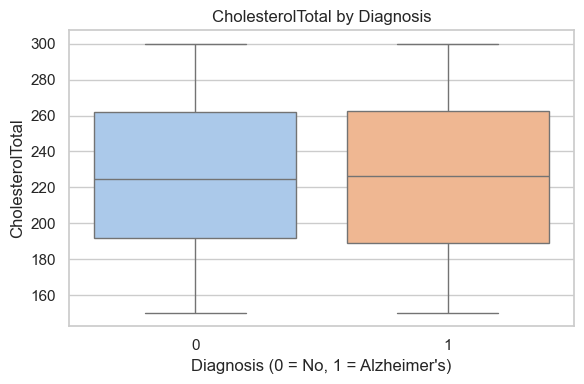

Plot saved to: ../plots\cholesteroltotal_boxplot_by_diagnosis.png
Caption saved to: ../plots\cholesteroltotal_boxplot_by_diagnosis.txt


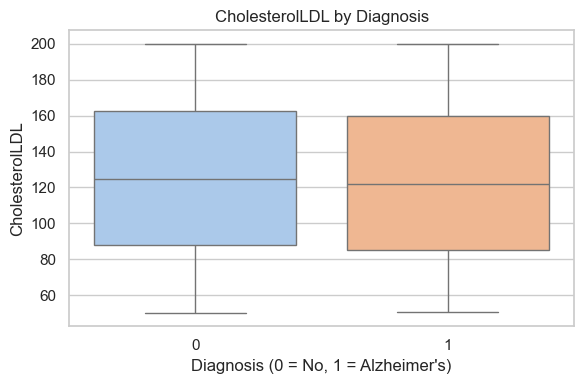

Plot saved to: ../plots\cholesterolldl_boxplot_by_diagnosis.png
Caption saved to: ../plots\cholesterolldl_boxplot_by_diagnosis.txt


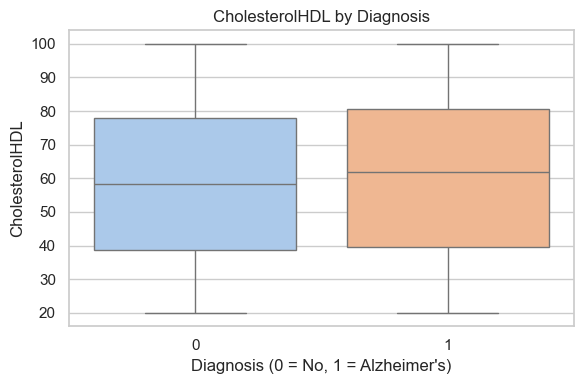

Plot saved to: ../plots\cholesterolhdl_boxplot_by_diagnosis.png
Caption saved to: ../plots\cholesterolhdl_boxplot_by_diagnosis.txt


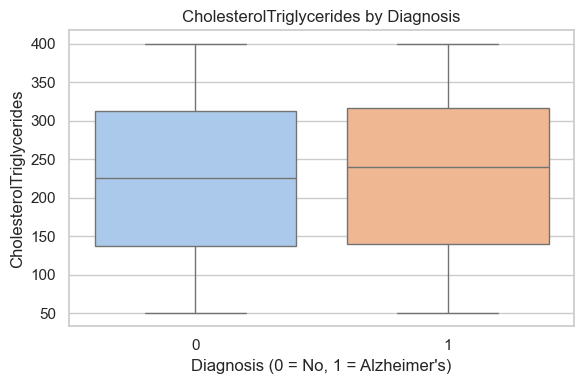

Plot saved to: ../plots\cholesteroltriglycerides_boxplot_by_diagnosis.png
Caption saved to: ../plots\cholesteroltriglycerides_boxplot_by_diagnosis.txt


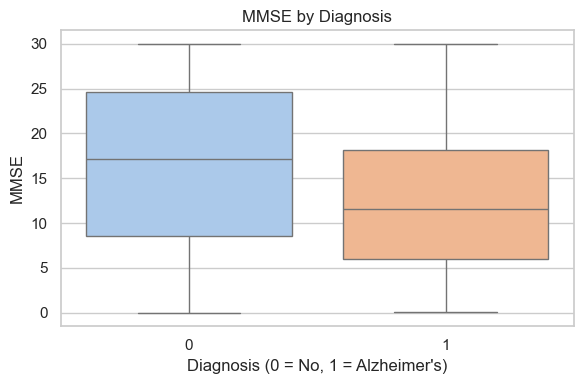

Plot saved to: ../plots\mmse_boxplot_by_diagnosis.png
Caption saved to: ../plots\mmse_boxplot_by_diagnosis.txt


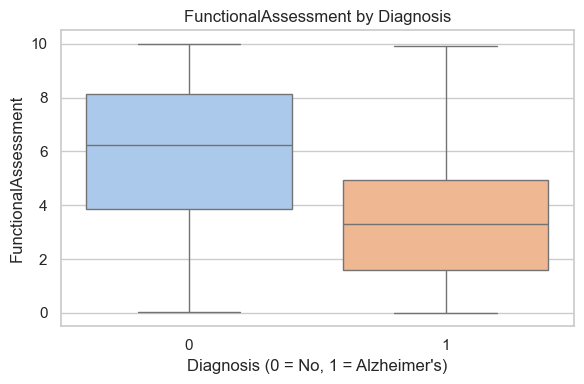

Plot saved to: ../plots\functionalassessment_boxplot_by_diagnosis.png
Caption saved to: ../plots\functionalassessment_boxplot_by_diagnosis.txt


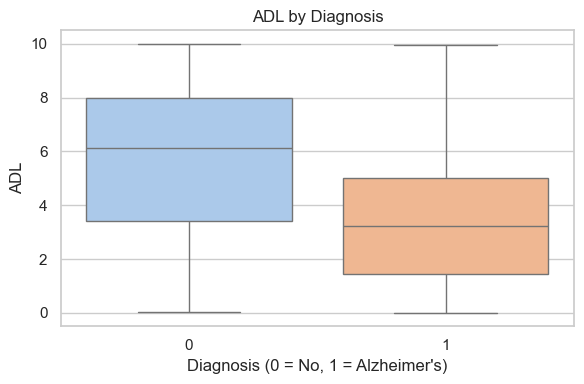

Plot saved to: ../plots\adl_boxplot_by_diagnosis.png
Caption saved to: ../plots\adl_boxplot_by_diagnosis.txt


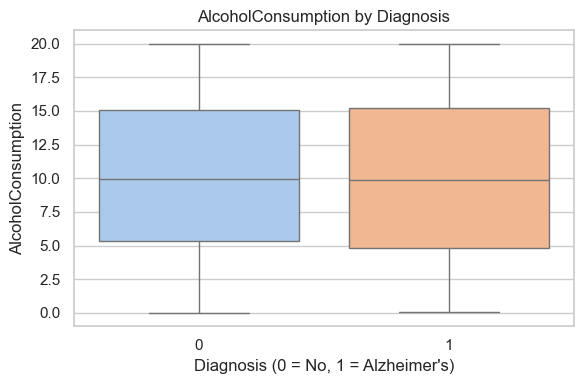

Plot saved to: ../plots\alcoholconsumption_boxplot_by_diagnosis.png
Caption saved to: ../plots\alcoholconsumption_boxplot_by_diagnosis.txt


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Define where to save the plots
plot_folder = "../plots"

# Loop over each feature and save individually
for feature in continuous_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        palette="pastel",
        hue="Diagnosis",  # Optional: adds color by class
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"{feature} by Diagnosis", fontsize=12)
    ax.set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    ax.set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # Save the figure
    save_plot(
        fig,
        filename=f"{feature.lower()}_boxplot_by_diagnosis.png",
        caption=f"Boxplot of {feature} grouped by diagnosis (0 = No, 1 = Alzheimer's).",
        folder_path=plot_folder
    )

### Interpretation of Boxplots

This set of visual comparisons reveals several important differences:

MMSE, FunctionalAssessment, and ADL show strong separation between diagnosis groups. Patients with Alzheimer's have clearly lower scores, confirming cognitive and functional decline.

SleepQuality and PhysicalActivity also show slightly lower medians in the diagnosed group, suggesting lifestyle differences.

Cholesterol and blood pressure values vary widely but do not show strong or consistent differences between diagnosis groups.

AlcoholConsumption shows slightly lower values in diagnosed patients, but with high variability.

These patterns help us prioritize features for modeling. Variables that show strong separation are more likely to contribute predictive power.

--------------

## Lifestyle Features by Diagnosis

Lifestyle variables such as diet, physical activity, sleep, and alcohol use may influence cognitive health.

In this section, we explore how these features vary between patients with and without an Alzheimer's diagnosis using boxplots.

Boxplots help us identify whether there are meaningful differences between groups that might make these features useful for prediction.

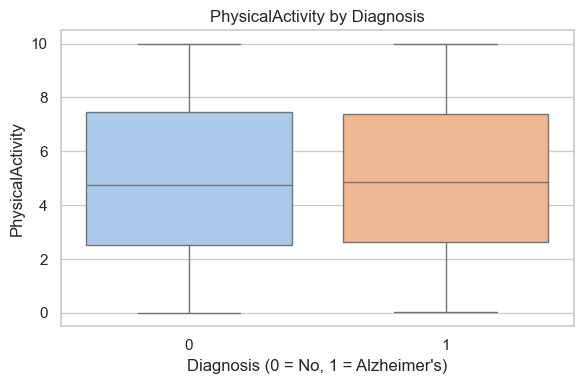

Plot saved to: ../plots\physicalactivity_lifestyle_boxplot.png
Caption saved to: ../plots\physicalactivity_lifestyle_boxplot.txt


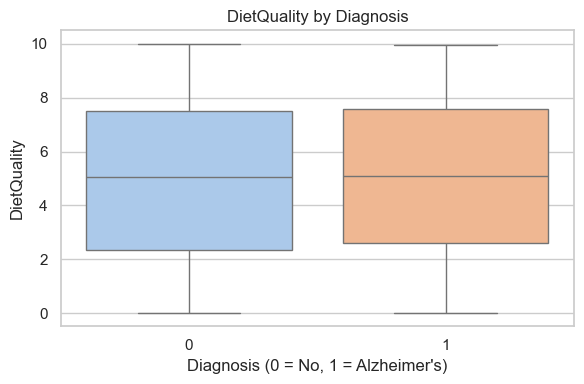

Plot saved to: ../plots\dietquality_lifestyle_boxplot.png
Caption saved to: ../plots\dietquality_lifestyle_boxplot.txt


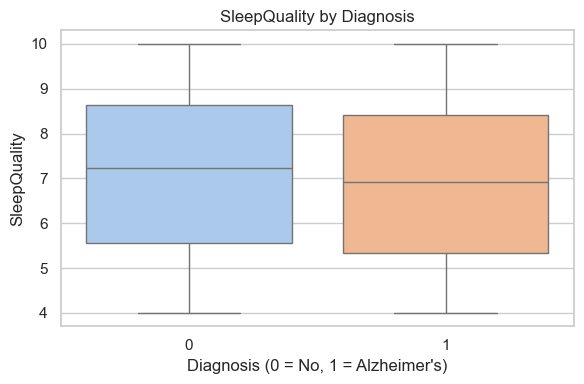

Plot saved to: ../plots\sleepquality_lifestyle_boxplot.png
Caption saved to: ../plots\sleepquality_lifestyle_boxplot.txt


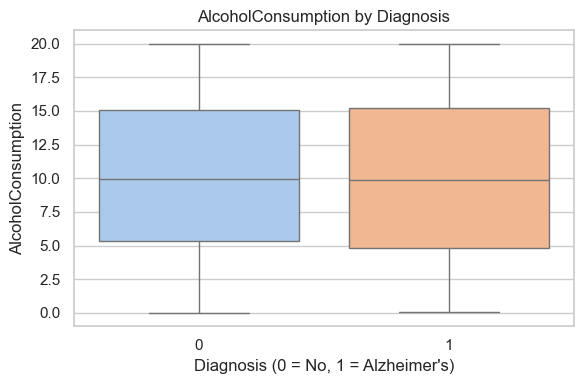

Plot saved to: ../plots\alcoholconsumption_lifestyle_boxplot.png
Caption saved to: ../plots\alcoholconsumption_lifestyle_boxplot.txt


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define lifestyle-related features
lifestyle_features = ["PhysicalActivity", "DietQuality", "SleepQuality", "AlcoholConsumption"]

# Set Seaborn style
sns.set(style="whitegrid")

# Folder to save plots
plot_folder = "../plots"

# Loop through each lifestyle feature
for feature in lifestyle_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        palette="pastel",
        hue="Diagnosis",
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"{feature} by Diagnosis", fontsize=12)
    ax.set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    ax.set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # Save each plot
    save_plot(
        fig,
        filename=f"{feature.lower()}_lifestyle_boxplot.png",
        caption=f"Boxplot of {feature} by Alzheimer's diagnosis group.",
        folder_path=plot_folder
    )


### Interpretation of Lifestyle Patterns
From these boxplots, we can make the following observations:

- PhysicalActivity, DietQuality, and SleepQuality show slightly lower values among patients with Alzheimer's, although the difference is modest.

- AlcoholConsumption does not show a large difference between groups, but there is noticeable spread in the data, with some high outliers in both groups.

These features show some variation by diagnosis but may not be strong predictors on their own. However, when combined with other features (e.g., cognitive or behavioral data), they may still contribute value to a predictive model.

This analysis also reinforces the decision to treat AlcoholConsumption as a continuous feature rather than binary.

## Cholesterol Levels by Diagnosis

### Cholesterol and Alzheimer's Diagnosis
Cholesterol levels are closely tied to cardiovascular health, which may impact brain function and contribute to the risk of cognitive decline. In this section, we examine how key cholesterol markers differ between individuals diagnosed with Alzheimer's and those without the condition.

We focus on the following indicators:

- Total Cholesterol (CholesterolTotal)
- LDL (Low-Density Lipoprotein) – often referred to as "bad" cholesterol (CholesterolLDL)
- HDL (High-Density Lipoprotein) – known as "good" cholesterol (CholesterolHDL)
- Triglycerides (CholesterolTriglycerides)

Using boxplots, we can visualize and compare the distribution, median values, and variability of each cholesterol marker across diagnosis groups. This helps us identify potential patterns or differences relevant to Alzheimer’s risk.

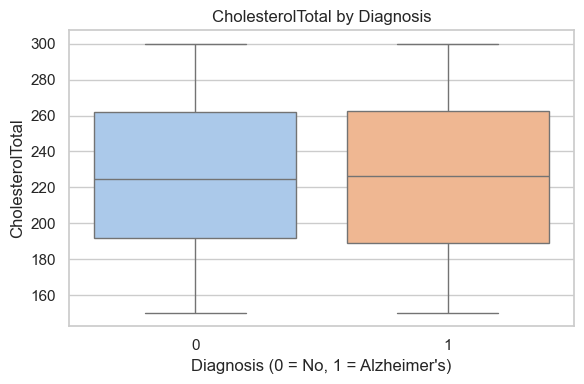

Plot saved to: ../plots\cholesteroltotal_cholesterol_boxplot.png
Caption saved to: ../plots\cholesteroltotal_cholesterol_boxplot.txt


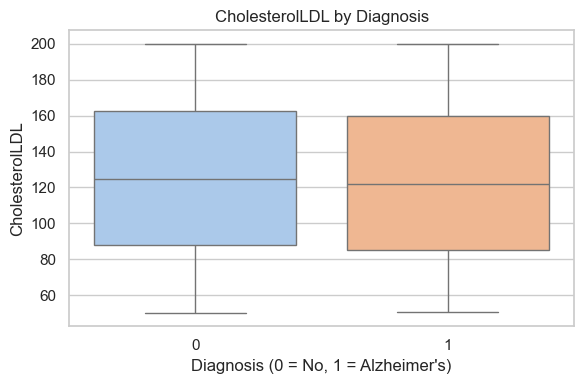

Plot saved to: ../plots\cholesterolldl_cholesterol_boxplot.png
Caption saved to: ../plots\cholesterolldl_cholesterol_boxplot.txt


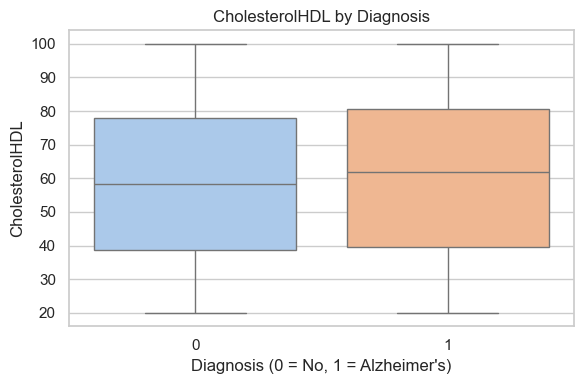

Plot saved to: ../plots\cholesterolhdl_cholesterol_boxplot.png
Caption saved to: ../plots\cholesterolhdl_cholesterol_boxplot.txt


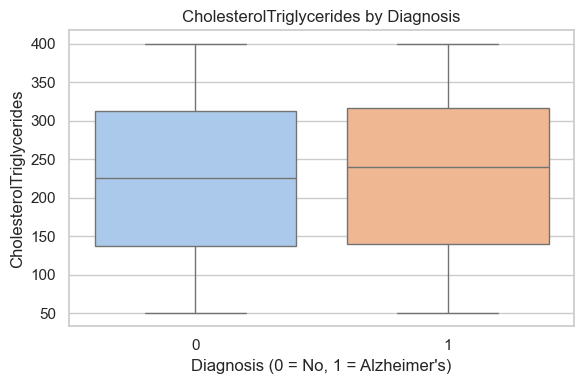

Plot saved to: ../plots\cholesteroltriglycerides_cholesterol_boxplot.png
Caption saved to: ../plots\cholesteroltriglycerides_cholesterol_boxplot.txt


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define cholesterol-related features
cholesterol_features = ["CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]

# Set Seaborn style
sns.set(style="whitegrid")

# Folder to save plots
plot_folder = "../plots"

# Loop through each cholesterol feature
for feature in cholesterol_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        palette="pastel",
        hue="Diagnosis",  # future-proof
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"{feature} by Diagnosis", fontsize=12)
    ax.set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    ax.set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # Save each figure
    save_plot(
        fig,
        filename=f"{feature.lower()}_cholesterol_boxplot.png",
        caption=f"Boxplot of {feature} by Alzheimer's diagnosis group.",
        folder_path=plot_folder
    )

### Interpretation of Cholesterol Patterns
From the plots above:

There is no strong or consistent difference in cholesterol markers between patients with and without Alzheimer's.

All four markers show high variability, and the medians are similar across both diagnosis groups.

Although cholesterol is relevant to cardiovascular health, it does not appear to be a distinguishing factor in this dataset.

This suggests that cholesterol values may not be strong individual predictors for Alzheimer's in this context. However, they could still contribute value when combined with other variables during model training.

------------------------------------

### Correlation Matrix

The correlation matrix helps identify which features are closely related. We now calculate and visualize the correlation matrix for all numerical features in the dataset.

This matrix helps us:
- Identify features that are strongly related to the target variable Diagnosis
- Detect redundancy between features (multicollinearity), which may affect model stability
- Understand relationships between clinical, lifestyle, and behavioral variables

We are especially interested in features with strong positive or negative correlations with Diagnosis, as these may serve as good predictors.

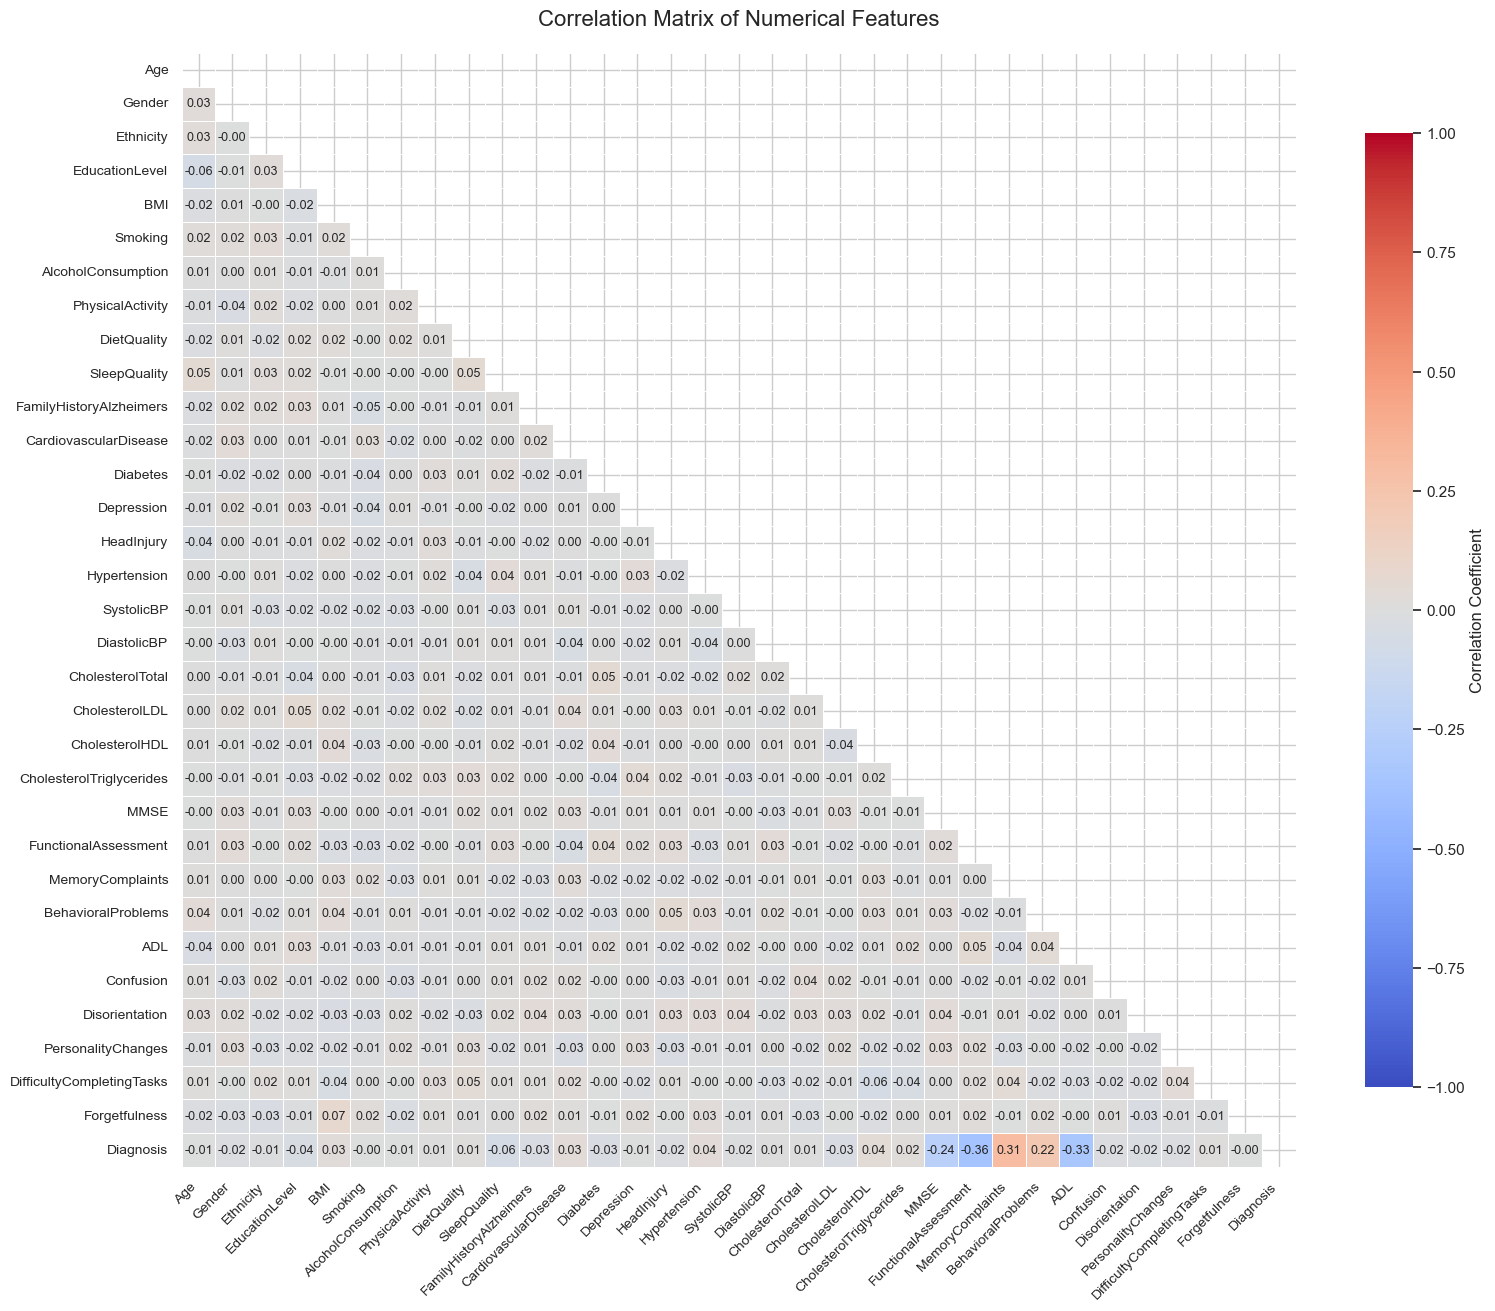

Plot saved to: ../plots\correlation_matrix_heatmap.png
Caption saved to: ../plots\correlation_matrix_heatmap.txt


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix (only for numerical columns)
correlation_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 14))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    annot_kws={"size": 9},
    ax=ax
)

# Customize the plot
ax.set_title("Correlation Matrix of Numerical Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Save the figure
save_plot(
    fig,
    filename="correlation_matrix_heatmap.png",
    caption="Heatmap showing the correlation between numerical features in the dataset.",
    folder_path="../plots"
)

### Correlation Matrix Snippet

To better focus on the most relevant relationships, we created a zoomed-in correlation matrix showing only a subset of key features. This includes variables related to cognitive function (like MMSE, FunctionalAssessment, and ADL), as well as selected lifestyle and clinical metrics.

By limiting the scope of the matrix, we can more clearly observe how strongly each of these features correlates with the Alzheimer’s diagnosis — and with each other — without the distraction of unrelated variables. This helps prioritize features that may be important in modeling.

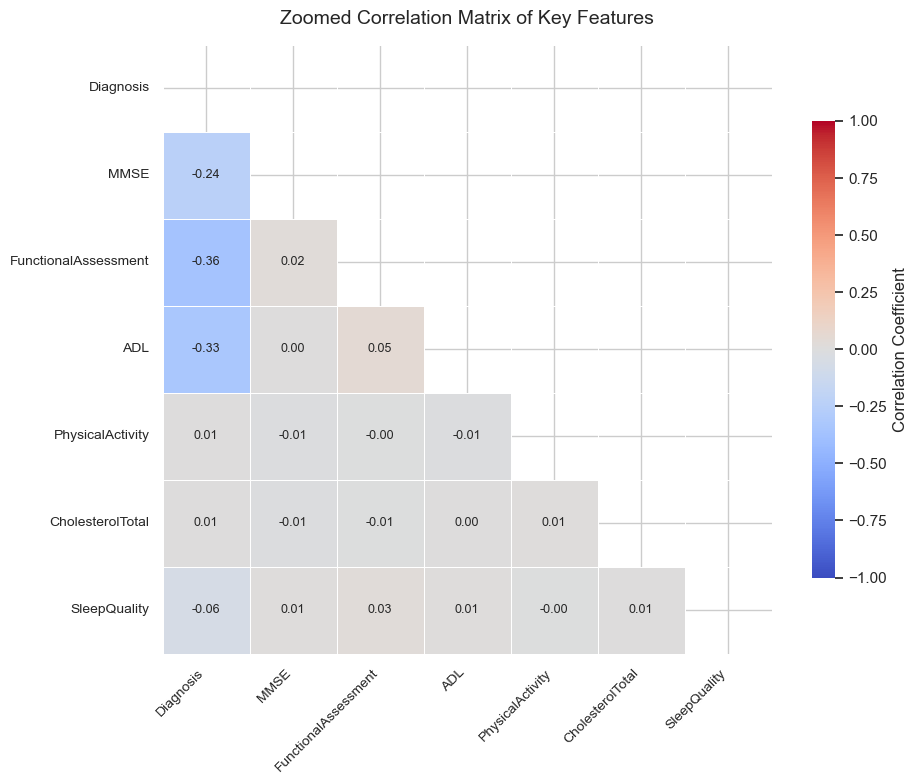

Plot saved to: ../plots\zoomed_correlation_matrix.png
Caption saved to: ../plots\zoomed_correlation_matrix.txt


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for a closer look
focus_features = ["Diagnosis", "MMSE", "FunctionalAssessment", "ADL", 
                  "PhysicalActivity", "CholesterolTotal", "SleepQuality"]

# Slice the correlation matrix
zoomed_corr = df[focus_features].corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(zoomed_corr, dtype=bool))

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    zoomed_corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    annot_kws={"size": 9},
    ax=ax
)

# Customize layout
ax.set_title("Zoomed Correlation Matrix of Key Features", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Save the plot
save_plot(
    fig,
    filename="zoomed_correlation_matrix.png",
    caption="Focused heatmap of correlations between key features related to Alzheimer's diagnosis.",
    folder_path="../plots"
)

### Interpretation of the Correlation Matrix
The correlation matrix provides useful insight into how each numerical feature relates to the Alzheimer's diagnosis. Notably, the strongest negative correlations with the diagnosis are observed in MMSE (a cognitive score), FunctionalAssessment, and ADL (Activities of Daily Living). This suggests that lower scores in these assessments are strongly associated with an Alzheimer’s diagnosis, which supports clinical understanding of cognitive decline in such patients.

Interestingly, these three features are moderately correlated with each other, reflecting their shared focus on cognitive and functional performance. However, their correlations are not so high as to suggest redundancy, meaning all three may still contribute useful, distinct signals in modeling.

In contrast, most lifestyle and clinical variables—including blood pressure, cholesterol, and alcohol consumption—show weak or negligible correlation with diagnosis. This highlights the central role of cognitive and functional scores in predicting Alzheimer’s in this dataset.

These insights align with our main research question from Notebook 01, which emphasizes the importance of clinical and cognitive features in risk prediction. In the following section, we’ll explore these top features more closely using violin plots for deeper distributional insights.

---------------------------

## Key Predictive Features by Diagnosis

Based on the correlation matrix and earlier boxplot analysis, the features MMSE, FunctionalAssessment, and ADL show the strongest differences between patients with and without an Alzheimer's diagnosis.

These features measure aspects of cognitive ability and functional independence.

We use violin plots here to highlight not just the median and spread, but the shape of the distributions in each diagnosis group.

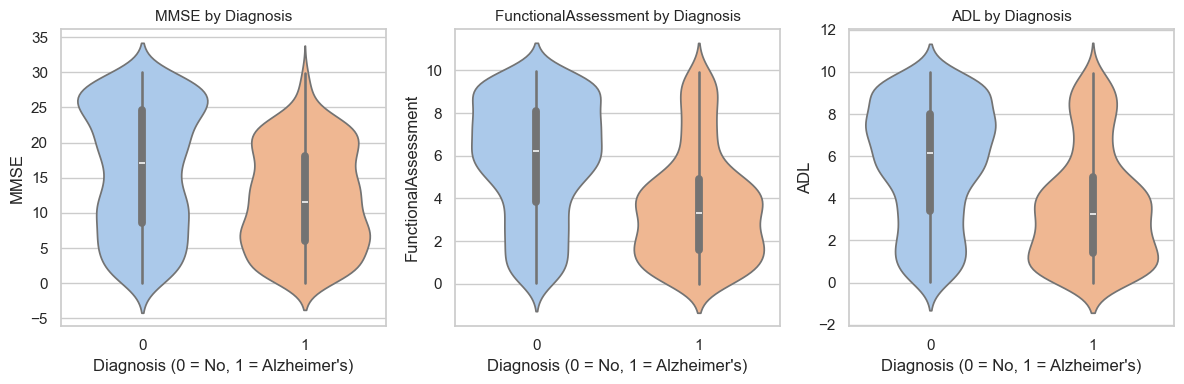

Plot saved to: ../plots\violinplot_key_features_by_diagnosis.png
Caption saved to: ../plots\violinplot_key_features_by_diagnosis.txt


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key cognitive/functional features
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each violinplot
for idx, feature in enumerate(key_features):
    sns.violinplot(
        data=df,
        x="Diagnosis",
        y=feature,
        hue="Diagnosis",         # For future-proofing with Seaborn
        inner="box",
        palette="pastel",
        ax=axes[idx],
        legend=False             # Hide redundant legend
    )
    axes[idx].set_title(f"{feature} by Diagnosis", fontsize=11)
    axes[idx].set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Save the plot
save_plot(
    fig,
    filename="violinplot_key_features_by_diagnosis.png",
    caption="Violin plots showing the distribution of MMSE, Functional Assessment, and ADL scores across diagnosis groups.",
    folder_path="../plots"
)

### Interpretation of Key Predictive Features

These violin plots give us a detailed look at how the values for MMSE, FunctionalAssessment, and ADL differ between patients with and without Alzheimer's.

**What the plots show:**
The width of each violin indicates the density of data points at that value.

The white dot represents the median.

The box inside shows the interquartile range (middle 50% of values).

The lines extending from the box mark the rest of the distribution.

**MMSE (Mini-Mental State Exam):**
Patients diagnosed with Alzheimer's have MMSE scores concentrated toward the lower end (0 to 15), with a clear drop in median.

Non-diagnosed patients show a wider spread toward the higher end (20 to 30), consistent with preserved cognitive function.

This feature shows a strong separation and is likely the single most predictive variable.

**FunctionalAssessment:**
FunctionalAssessment scores measure the patient's ability to complete daily tasks.

The median score for the diagnosed group is significantly lower.

While there's overlap, the overall shift in distribution indicates reduced functional ability is common in diagnosed patients.

**ADL (Activities of Daily Living):**
Similar to FunctionalAssessment but more specific to basic daily functions.

The pattern closely mirrors FunctionalAssessment, reinforcing the importance of functional independence as a predictive factor.

**Why this matters:**
These three features directly capture cognitive and functional decline, which are key indicators of Alzheimer's disease.

They are not only statistically correlated with the Diagnosis variable but also make clinical sense in the context of how the disease is diagnosed and progresses.

Their clean and consistent separation across groups makes them ideal inputs for a classification model.

These findings align directly with the project goal defined in Notebook 01:
to identify measurable patterns in patient data that help predict Alzheimer's diagnosis early.

-----------------------------

### ## Scatterplot-Based Feature Analysis

### Focused 2D Feature Comparison: MMSE vs ADL

Instead of plotting all pairwise feature interactions, we selected specific combinations that are relevant for understanding Alzheimer’s diagnosis. 

This scatterplot shows the interaction between two key continuous predictors:
- **MMSE** (cognitive function)
- **ADL** (ability to perform daily activities)

Each point represents one patient. The color represents the diagnosis:
- **Orange** = Alzheimer's (1)
- **Blue** = No Alzheimer's (0)

What we are looking for:
- **Clusters** that indicate separation between diagnosis groups.
- **Patterns** that support the use of MMSE and ADL as meaningful predictive features.

This visual supports early feature evaluation and helps us reflect on which variables might be important in future classification models.


#### Plot 1 – MMSE vs. ADL
In this scatterplot, we visualized the relationship between two continuous variables: MMSE (Mini-Mental State Examination) and ADL (Activities of Daily Living), colored by the categorical variable Diagnosis.

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MMSE", y="ADL", hue="Diagnosis")
plt.title("MMSE vs ADL by Diagnosis")
plt.xlabel("MMSE Score")
plt.ylabel("ADL (Activities of Daily Living)")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_adl_vs_mmse.png",
    caption="Scatterplot showing relationship between MMSE and ADL, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)



Plot saved to: ../plots\scatterplot_adl_vs_mmse.png
Caption saved to: ../plots\scatterplot_adl_vs_mmse.txt


### Output explained:
We created a scatterplot to explore the relationship between MMSE and ADL, using the same structure we learned in class (Titanic notebook).

The goal was to keep it simple and explainable, rather than advanced or overly styled.  
We also saved the plot using our custom `save_plot()` function to keep all figures well-organized in the `/plots` folder for later reference.

---
### So what do we see?

There is a clear **positive correlation** between MMSE (cognitive score) and ADL (daily living ability):
- Patients with **higher MMSE scores** tend to have **higher ADL**, indicating stronger cognitive and physical function.
- Patients with **lower MMSE scores** often have **lower ADL**, showing signs of both mental and physical decline.

From a **Business Intelligence** perspective, this plot supports **feature evaluation**:
- Both MMSE and ADL help to **differentiate between diagnosis groups** (especially Dementia vs NL).
- The features show **visible separation** between categories, which is useful for analysis.

We also observe **cluster tendencies**:
- **Dementia** cases are mostly in the **lower-left corner** (low MMSE and low ADL).
- **NL** cases are more spread across the top and right, showing better function.

This finding supports future **predictive modelling**, where MMSE and ADL could be used as strong input variables in classification tasks.


#### Plot 2 – MMSE vs. PhysicalActivity

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MMSE", y="PhysicalActivity", hue="Diagnosis")
plt.title("MMSE vs Physical Activity by Diagnosis")
plt.xlabel("MMSE Score")
plt.ylabel("Physical Activity Level")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_mmse_vs_physicalactivity.png",
    caption="Scatterplot showing relationship between MMSE and Physical Activity, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)



Plot saved to: ../plots\scatterplot_mmse_vs_physicalactivity.png
Caption saved to: ../plots\scatterplot_mmse_vs_physicalactivity.txt


### So what do we see?

Unlike the previous plot, this one shows **less clear separation** between the groups:
- Patients are more **evenly distributed**, with both diagnosis groups overlapping across the entire plot.
- There is **no strong visible trend** between MMSE and Physical Activity, though patients with higher MMSE seem slightly more active overall.

From an analysis perspective:
- Physical Activity appears to be a **weaker indicator** for diagnosis than ADL.
- The feature might still contribute value when **combined with other predictors**.

This shows the importance of testing **feature combinations**, not just individual variables, when building predictive tools.


#### Plot 3 – FunctionalAssessment vs. ADL

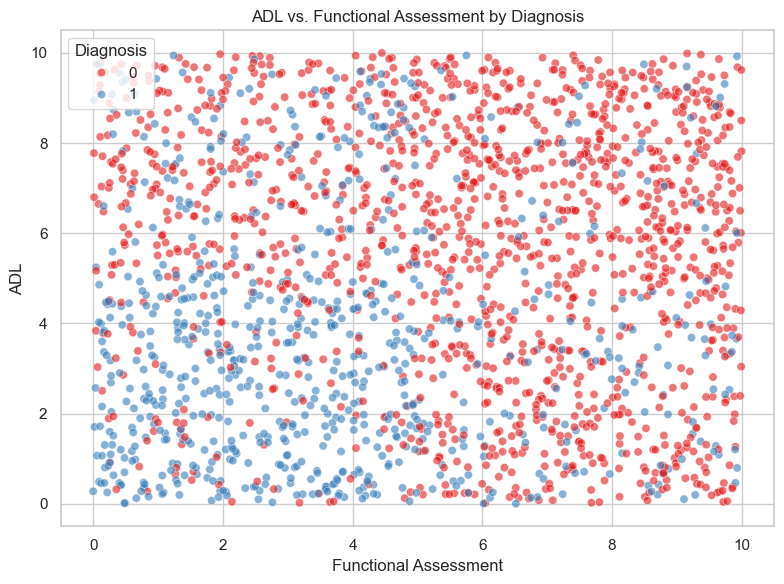

Plot saved to: ../plots\scatterplot_adl_vs_functional_assessment.png
Caption saved to: ../plots\scatterplot_adl_vs_functional_assessment.txt


In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="FunctionalAssessment",
    y="ADL",
    hue="Diagnosis",
    palette="Set1",
    alpha=0.6
)
plt.title("ADL vs. Functional Assessment by Diagnosis")
plt.xlabel("Functional Assessment")
plt.ylabel("ADL")
plt.legend(title="Diagnosis")
plt.grid(True)
plt.tight_layout()
plt.show()

fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_adl_vs_functional_assessment.png",
    caption="Scatterplot showing relationship between Functional Assessment and ADL, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

#### Plot 4 – Age vs. MMSE

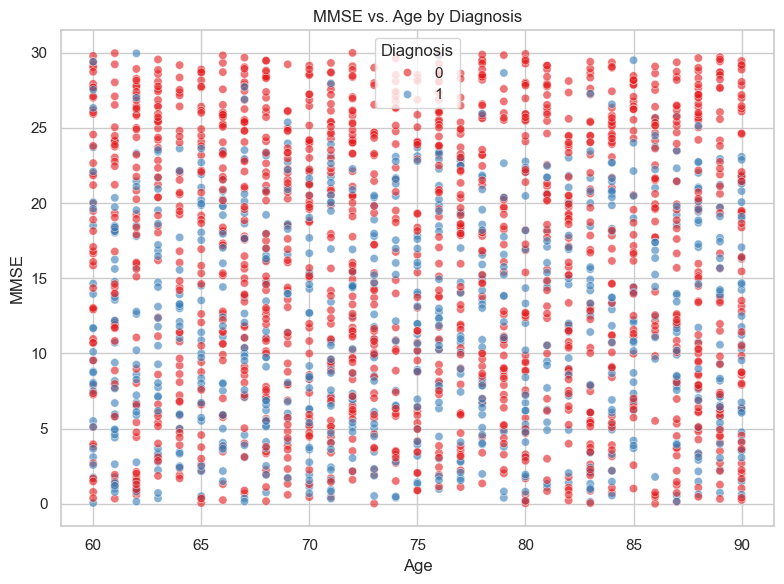

Plot saved to: ../plots\scatterplot_mmse_vs_age.png
Caption saved to: ../plots\scatterplot_mmse_vs_age.txt


In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="MMSE",
    hue="Diagnosis",
    palette="Set1",
    alpha=0.6
)
plt.title("MMSE vs. Age by Diagnosis")
plt.xlabel("Age")
plt.ylabel("MMSE")
plt.legend(title="Diagnosis")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_mmse_vs_age.png",
    caption="Scatterplot showing the relationship between Age and MMSE, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

#### Plot 5 – SleepQuality vs. MMSE

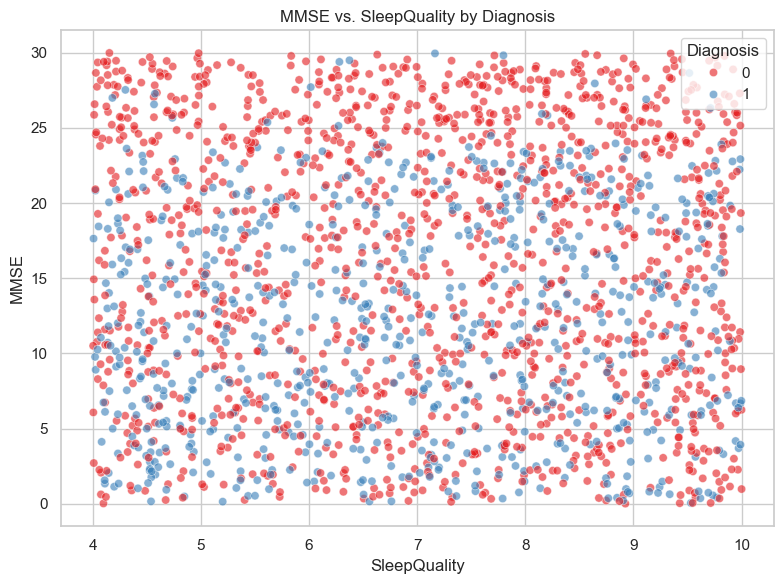

Plot saved to: ../plots\scatterplot_mmse_vs_sleepquality.png
Caption saved to: ../plots\scatterplot_mmse_vs_sleepquality.txt


In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="SleepQuality",
    y="MMSE",
    hue="Diagnosis",
    palette="Set1",
    alpha=0.6
)
plt.title("MMSE vs. SleepQuality by Diagnosis")
plt.xlabel("SleepQuality")
plt.ylabel("MMSE")
plt.legend(title="Diagnosis")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_mmse_vs_sleepquality.png",
    caption="Scatterplot showing the relationship between Sleep Quality and MMSE, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

#### Observations:
MMSE vs. ADL
Clear cluster of Alzheimer's patients in the lower-left, where both cognitive and functional scores are low. Strong separation from non-Alzheimer’s patients.

MMSE vs. PhysicalActivity
Slight downward trend in diagnosed patients, suggesting those with lower MMSE scores also report less activity.

FunctionalAssessment vs. ADL
High correlation, as expected. Alzheimer’s group tends to cluster in the lower score range.

Age vs. MMSE
Alzheimer's patients are slightly older on average, but there's considerable overlap. MMSE shows more separation than age.

SleepQuality vs. MMSE
Slight positive trend: better sleep may be associated with higher cognitive scores, but the class separation is limited.

#### Why this matters:
These interaction plots help identify:

Feature combinations with high predictive power

Visual confirmation of class separability

Redundant or correlated features

These insights support feature selection and model design in the next sprint. They also confirm our project direction: using cognitive and behavioral data as primary predictors of Alzheimer's diagnosis.

-------------------------

## Feature Skewness Check

Skewness measures how symmetric a feature’s distribution is. A value of 0 indicates perfect symmetry, while positive or negative values indicate skewed distributions.

Skewed features may benefit from transformation (such as log or square root) before modeling—especially when using linear models or distance-based algorithms.

We check skewness for all continuous features to see if any stand out.

In [24]:
skewed = df[continuous_features].skew().sort_values(ascending=False)
print("Skewness of continuous features:")
display(skewed)

Skewness of continuous features:


Age                         0.045964
PhysicalActivity            0.044973
CholesterolHDL              0.042206
CholesterolLDL              0.036233
MMSE                        0.032382
AlcoholConsumption          0.018415
SystolicBP                  0.009971
DietQuality                -0.012058
CholesterolTotal           -0.018674
BMI                        -0.026715
ADL                        -0.030436
CholesterolTriglycerides   -0.032923
FunctionalAssessment       -0.034576
DiastolicBP                -0.054470
SleepQuality               -0.069630
dtype: float64

### Interpretation
All skewness values fall within a moderate range (between -0.07 and +0.05), indicating that:

Most continuous features in the dataset are close to symmetric.

No feature shows extreme skew that would immediately require transformation.

Normalization or scaling may still be applied during modeling, but log/sqrt transformation is likely unnecessary.

This result supports the idea that the dataset is already well-prepared for most algorithms.

-------------------------

## Low Variance Features

Features that contain very little variation—such as having almost the same value across all records—often do not contribute useful information for predictive models.

We check the number of unique values in each feature to identify those with low variance.

In [25]:
low_variance = df.nunique().sort_values()
print("Columns with lowest number of unique values:")
display(low_variance.head())

Columns with lowest number of unique values:


Diagnosis       2
Hypertension    2
HeadInjury      2
Depression      2
Diabetes        2
dtype: int64

### Interpretation
Some binary features have only two unique values (0 and 1), which is expected. These include:

Diagnosis (our target)

Hypertension

HeadInjury

Depression

Diabetes

While they are low in variance, these features may still carry predictive signal and should not be discarded without further testing.

We will evaluate their importance during model development by checking their feature importance scores or contribution to model accuracy.

-----------------------

## EDA Insights for Predicting Alzheimer’s
This exploratory analysis confirms that the dataset is well-structured, relevant, and suitable for supervised learning. The findings directly support the project's goal of identifying measurable features that help predict Alzheimer's diagnosis.

Class Balance
The target variable Diagnosis is evenly distributed, with a balanced number of diagnosed and non-diagnosed patients.

This ensures that classification models will not be biased toward one class.

Binary Features
Features such as MemoryComplaints, Disorientation, and BehavioralProblems occur more frequently in patients with Alzheimer’s.

Other binary symptoms like Confusion and Forgetfulness also show modest but consistent differences.

Some features (e.g., Hypertension, Smoking, Diabetes) show little variation and may contribute less to model performance.

Cognitive and Functional Features
MMSE, FunctionalAssessment, and ADL show the strongest separation between classes.

These features are not only statistically correlated with Diagnosis but also clinically meaningful, making them ideal predictors.

Lifestyle and Clinical Variables
Variables like PhysicalActivity, SleepQuality, and DietQuality show some differences between groups but with overlapping distributions.

Cholesterol and blood pressure features display high variance and little class separation, making them less likely to be individually predictive.

AlcoholConsumption was originally misclassified as binary. After correction, it was analyzed as a continuous variable and found to have high variance but limited class separation.

Feature Relationships and Interactions
Pairwise comparisons (scatter plots) show that combining features such as MMSE and ADL increases class separation.

The correlation matrix confirms strong relationships among cognitive and functional scores, while lifestyle and clinical features are largely uncorrelated with Diagnosis.

Distribution Quality
Skewness analysis shows that all continuous features are nearly symmetric; no major transformation is required before modeling.

Low-variance checks reveal that most binary features are informative and vary appropriately across the dataset.

Conclusion
The data is clean, comprehensive, and rich in meaningful patterns. It contains well-behaved numeric and categorical variables, strong predictors, and minimal preprocessing issues. This prepares us to confidently move forward to feature selection, model development, and evaluation in the next sprint.

## Notebook Summary

In this notebook, we explored the cleaned Alzheimer’s dataset to uncover patterns, relationships, and trends across clinical, behavioral, lifestyle, and cognitive variables. The goal was to identify features that are potentially predictive of an Alzheimer’s diagnosis.

We began by examining the balance of the target variable, confirming that both diagnosis classes are evenly represented. We then compared distributions across binary, continuous, and ordinal features—focusing on how they vary between patients with and without Alzheimer's.

Cognitive and functional scores (MMSE, FunctionalAssessment, and ADL) consistently showed strong separation between diagnosis groups, both visually and statistically. These features were further supported by the correlation matrix and violin plots, which reinforced their importance for modeling.

Lifestyle variables such as PhysicalActivity, DietQuality, and SleepQuality showed moderate differences, while cholesterol and blood pressure features showed high variance but little class separation. Several feature combinations—especially MMSE and ADL—demonstrated clear group clustering in scatterplots.

We also validated feature readiness by checking for skewness and low-variance issues, finding that all continuous features were well-distributed and no transformation was required.

This exploratory analysis confirms that the dataset is both clean and rich in informative patterns, making it ready for supervised learning. These findings directly support the project’s focus on predicting Alzheimer's diagnosis using measurable and clinically relevant features.


In [26]:
import sys
sys.path.append("..")  # Move up one directory

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="03_exploratory_data_analysis",
    summary={
        "description": "Performed detailed EDA to analyze clinical, lifestyle, and cognitive patterns linked to Alzheimer's diagnosis.",
        "records_analyzed": df.shape[0],
        "features_examined": df.shape[1],
        "eda_steps": [
            "Reviewed target class distribution",
            "Compared binary features across diagnosis groups",
            "Plotted histograms and boxplots for continuous features",
            "Analyzed lifestyle and cholesterol variables",
            "Computed correlation matrix and interpreted results",
            "Visualized top predictors with violin and scatter plots",
            "Checked feature skewness and variance"
        ],
        "key_insights": {
            "top_predictors": ["MMSE", "FunctionalAssessment", "ADL"],
            "lifestyle_value": "Moderate separation (e.g. SleepQuality, PhysicalActivity)",
            "cholesterol_value": "High variance, limited predictive separation",
            "dataset_ready": True
        },
        "output_file": "../data/alzheimers_clean.csv"
    }
)

Summary saved to: ../reports\03_exploratory_data_analysis_summary_2025-06-12_13-42-58.json


#### This notebook concludes the exploratory analysis phase for Alzheimer’s risk prediction. The identified patterns and prioritized features will now be used for model development and evaluation in the next notebook (04_Modeling_and_Prediction).

------------------------